In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Methanogenesis

In [3]:
data = [
    ["05.13", "KOP-1", -66.11, -17.35],
    ["05.13", "KOP-2", -70.02, -19.96],
    ["05.13", "KOP-3", -61.73, -18.52],
    ["05.13", "KOP-4", -55.05, -0.77],
    ["08.13", "KOP-1", -57.39, -14.9],
    ["08.13", "KOP-2", -64.61, -44.88],
    ["08.13", "KOP-4", -55.4, 3.01],
    ["11.13", "KOP-1", -58.03, 2.96],
    ["11.13", "KOP-4", -60.90, -11.12],
    ["02.14", "KOP-4", -58.52, 1.35],
    ["05.14", "KOP-1", -58.65, 6.03],
    ["05.14", "KOP-4", -57.77, 1.81],
    ["07.14", "KOP-1", -59.83, 0.11],
    ["07.14", "KOP-4", -57.99, -6.27]
]

In [4]:
df = pd.DataFrame(data, columns=["Date", "Station", "CH4", "CO2"])
df['Date'] = pd.to_datetime(df['Date'], format='%m.%y')

### Plot biological origination based on Whiticar 1999

In [5]:
ALPHA_A = 1.065
ALPHA_B = 1.055
ALPHA_C = 1.031
ALPHA_D = 1.005

# epsilon = 10^3 * ln(alpha)
linear_a = [ALPHA_A, 1000 * np.log(ALPHA_A)]
linear_b = [ALPHA_B, 1000 * np.log(ALPHA_B)]
linear_c = [ALPHA_C, 1000 * np.log(ALPHA_C)]
linear_d = [ALPHA_D, 1000 * np.log(ALPHA_D)]

In [6]:
colors = plt.cm.jet(np.linspace(0, 1, 4))
station_colors = {
    "KOP-1": colors[0],
    "KOP-2": colors[1],
    "KOP-3": colors[2],
    "KOP-4": colors[3]
}

In [14]:
def plot_boundries(x, cx=plt):
    cx.plot(x, linear_a[0] * x + linear_a[1], linestyle="--", color="#000000", alpha=0.4)
    cx.plot(x, linear_b[0] * x + linear_b[1], linestyle="--", color="#000000", alpha=0.4)
    cx.plot(x, linear_c[0] * x + linear_c[1], linestyle="--", color="#000000", alpha=0.4)
    cx.plot(x, linear_d[0] * x + linear_d[1], linestyle="--", color="#000000", alpha=0.4)

def plot_area_labels(cx=plt):
    cx.text(-90, 0, "CR", color="black", fontsize=24)
    cx.text(-60, -21, "AF", color="black", fontsize=24)
    cx.text(-55, -40, "OX", color="black", fontsize=24)


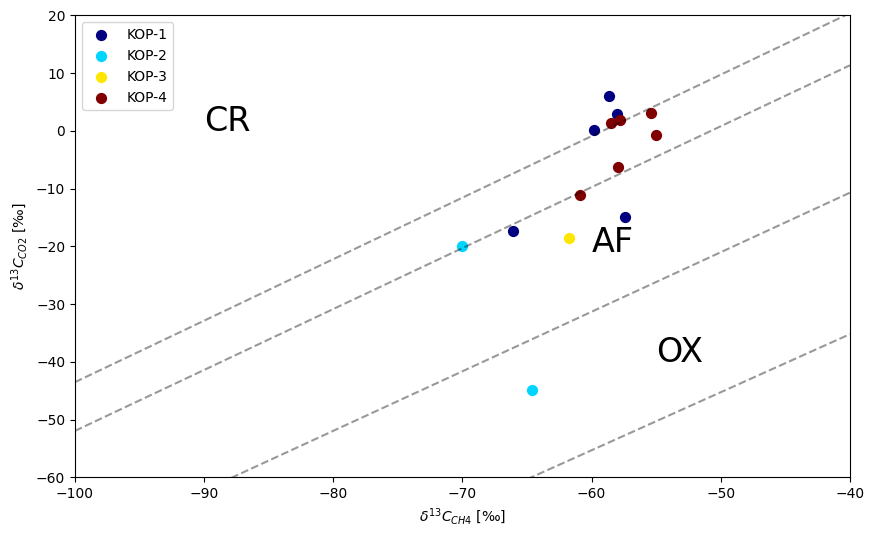

In [13]:
plt.figure(figsize=(10, 6))
x = np.linspace(-100, -40, 200)
plot_boundries(x, plt)

for station in df['Station'].unique():
    station_data = df[df['Station'] == station]
    plt.scatter(station_data['CH4'], station_data['CO2'], label=station, 
                color=station_colors[station], s=50)

plot_area_labels()

plt.ylabel(r"$\delta^{13}C_{CO2}$ [‰]")
plt.xlabel(r"$\delta^{13}C_{CH4}$ [‰]")

plt.legend()

plt.xlim(-100, -40)
plt.ylim(-60, 20)

plt.show()

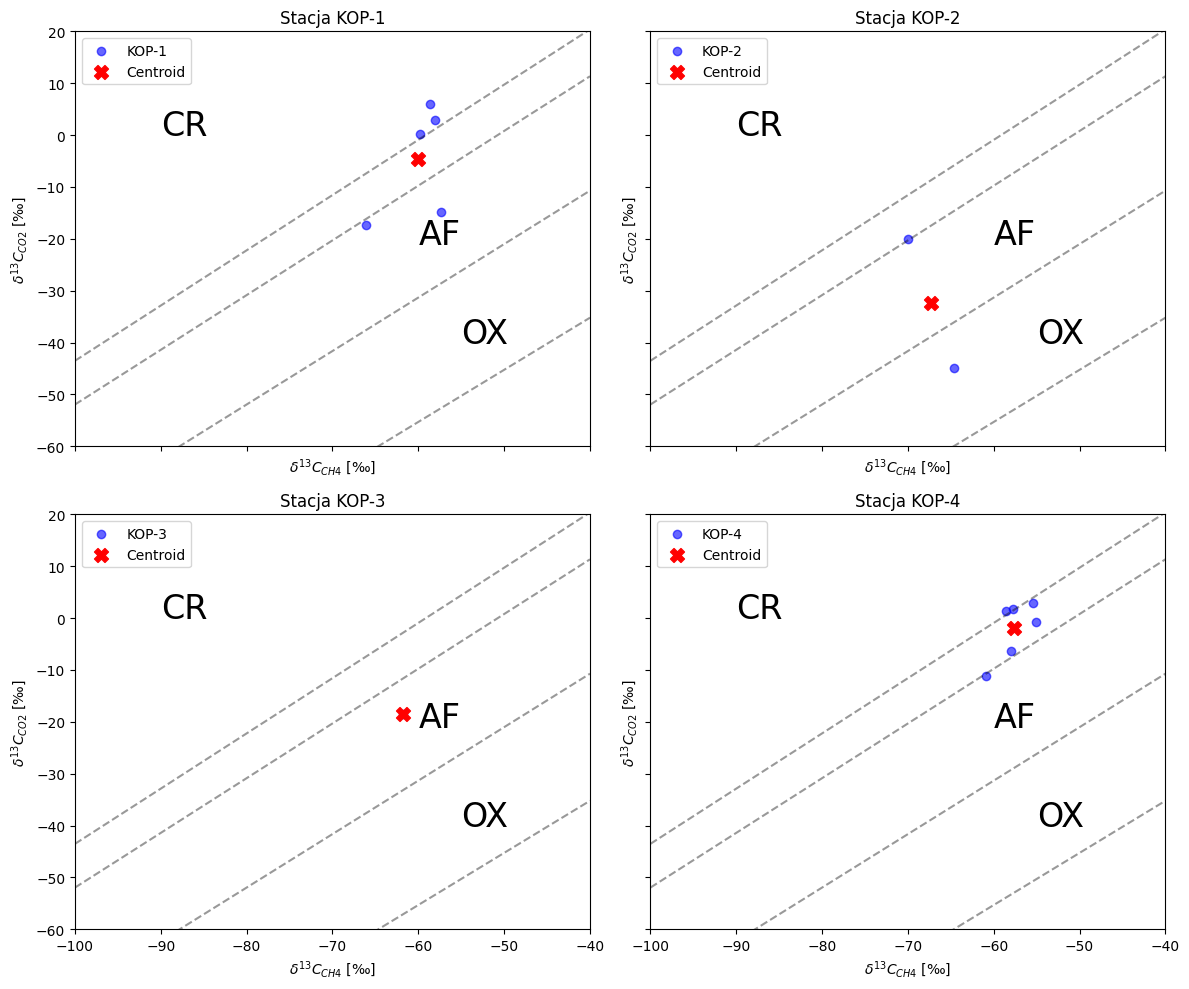

In [15]:
stations = ["KOP-1", "KOP-2", "KOP-3", "KOP-4"]
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True, sharex=True)
axes = axes.flatten()

for ax, station in zip(axes, stations):
    station_data = df[df['Station'] == station]

    plot_boundries(x, ax)
    
    centroid_ch4 = station_data['CH4'].mean()
    centroid_co2 = station_data['CO2'].mean()
    
    ax.scatter(station_data['CH4'], station_data['CO2'], label=f"{station}", color="blue", alpha=0.6)
    ax.scatter(centroid_ch4, centroid_co2, color="red", label="Centroid", s=100, marker="X")

    ax.set_title(f"Stacja {station}")
    ax.set_xlabel(r"$\delta^{13}C_{CH4}$ [‰]")
    ax.set_ylabel(r"$\delta^{13}C_{CO2}$ [‰]")
    ax.set_xlim(-100, -40)
    ax.set_ylim(-60, 20)

    plot_area_labels(ax)
    
    ax.legend()

for ax in axes[len(stations):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

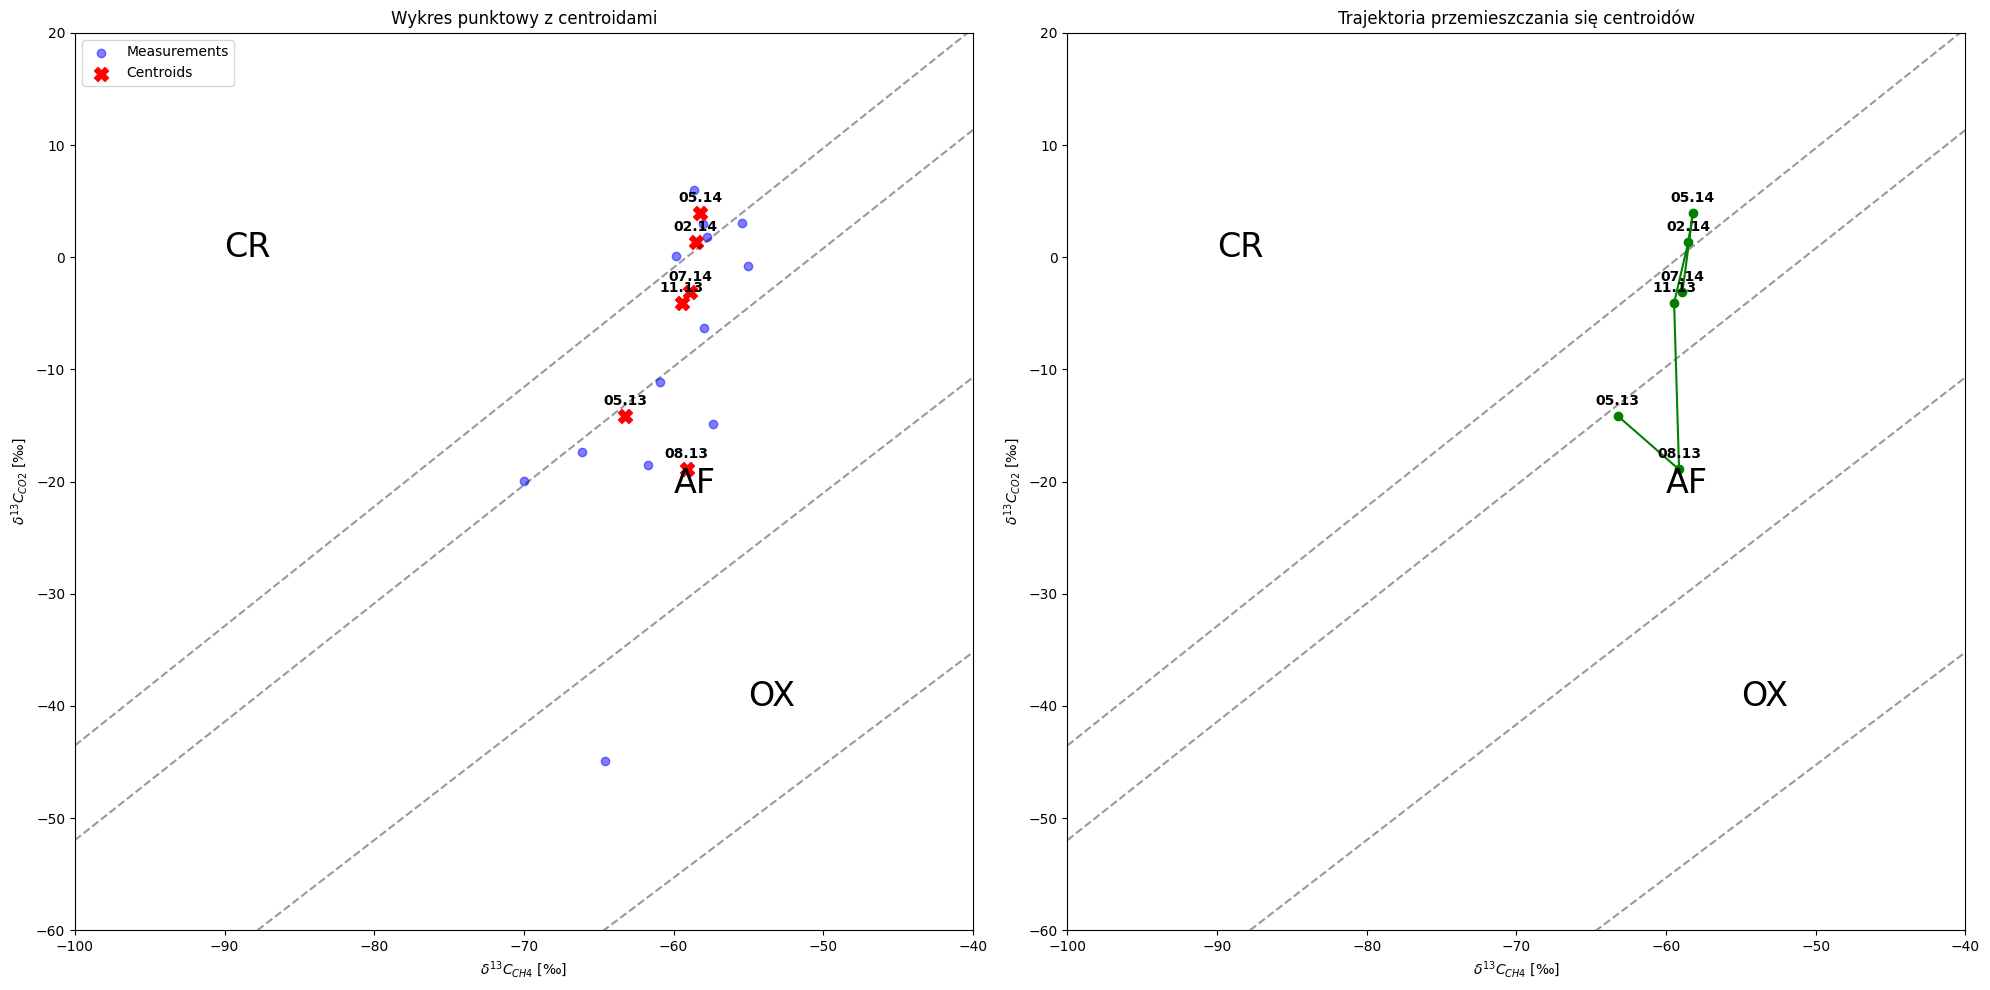

In [16]:
centroids = df.groupby('Date').agg({'CH4': 'mean', 'CO2': 'mean'}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes = axes.flatten()

axes[0].scatter(df['CH4'], df['CO2'], label="Measurements", alpha=0.5, color='blue')
axes[0].scatter(centroids['CH4'], centroids['CO2'], label="Centroids", color='red', s=100, marker='X')

for i, row in centroids.iterrows():
    axes[0].text(row['CH4'], row['CO2'] + 1, row['Date'].strftime('%m.%y'), color='black', fontsize=10, ha='center', fontweight='bold')
    axes[1].text(row['CH4'], row['CO2'] + 1, row['Date'].strftime('%m.%y'), color='black', fontsize=10, ha='center', fontweight='bold')

for i in range(2):
    plot_boundries(x, axes[i])
    plot_area_labels(axes[i])

    axes[i].set_xlim(-100, -40)
    axes[i].set_ylim(-60, 20)

    axes[i].set_xlabel(r"$\delta^{13}C_{CH4}$ [‰]")
    axes[i].set_ylabel(r"$\delta^{13}C_{CO2}$ [‰]")

axes[0].set_title("Wykres punktowy z centroidami")
axes[0].legend()

axes[1].plot(centroids['CH4'], centroids['CO2'], marker='o', color='green')
axes[1].set_title("Trajektoria przemieszczania się centroidów")

plt.tight_layout()
plt.show()

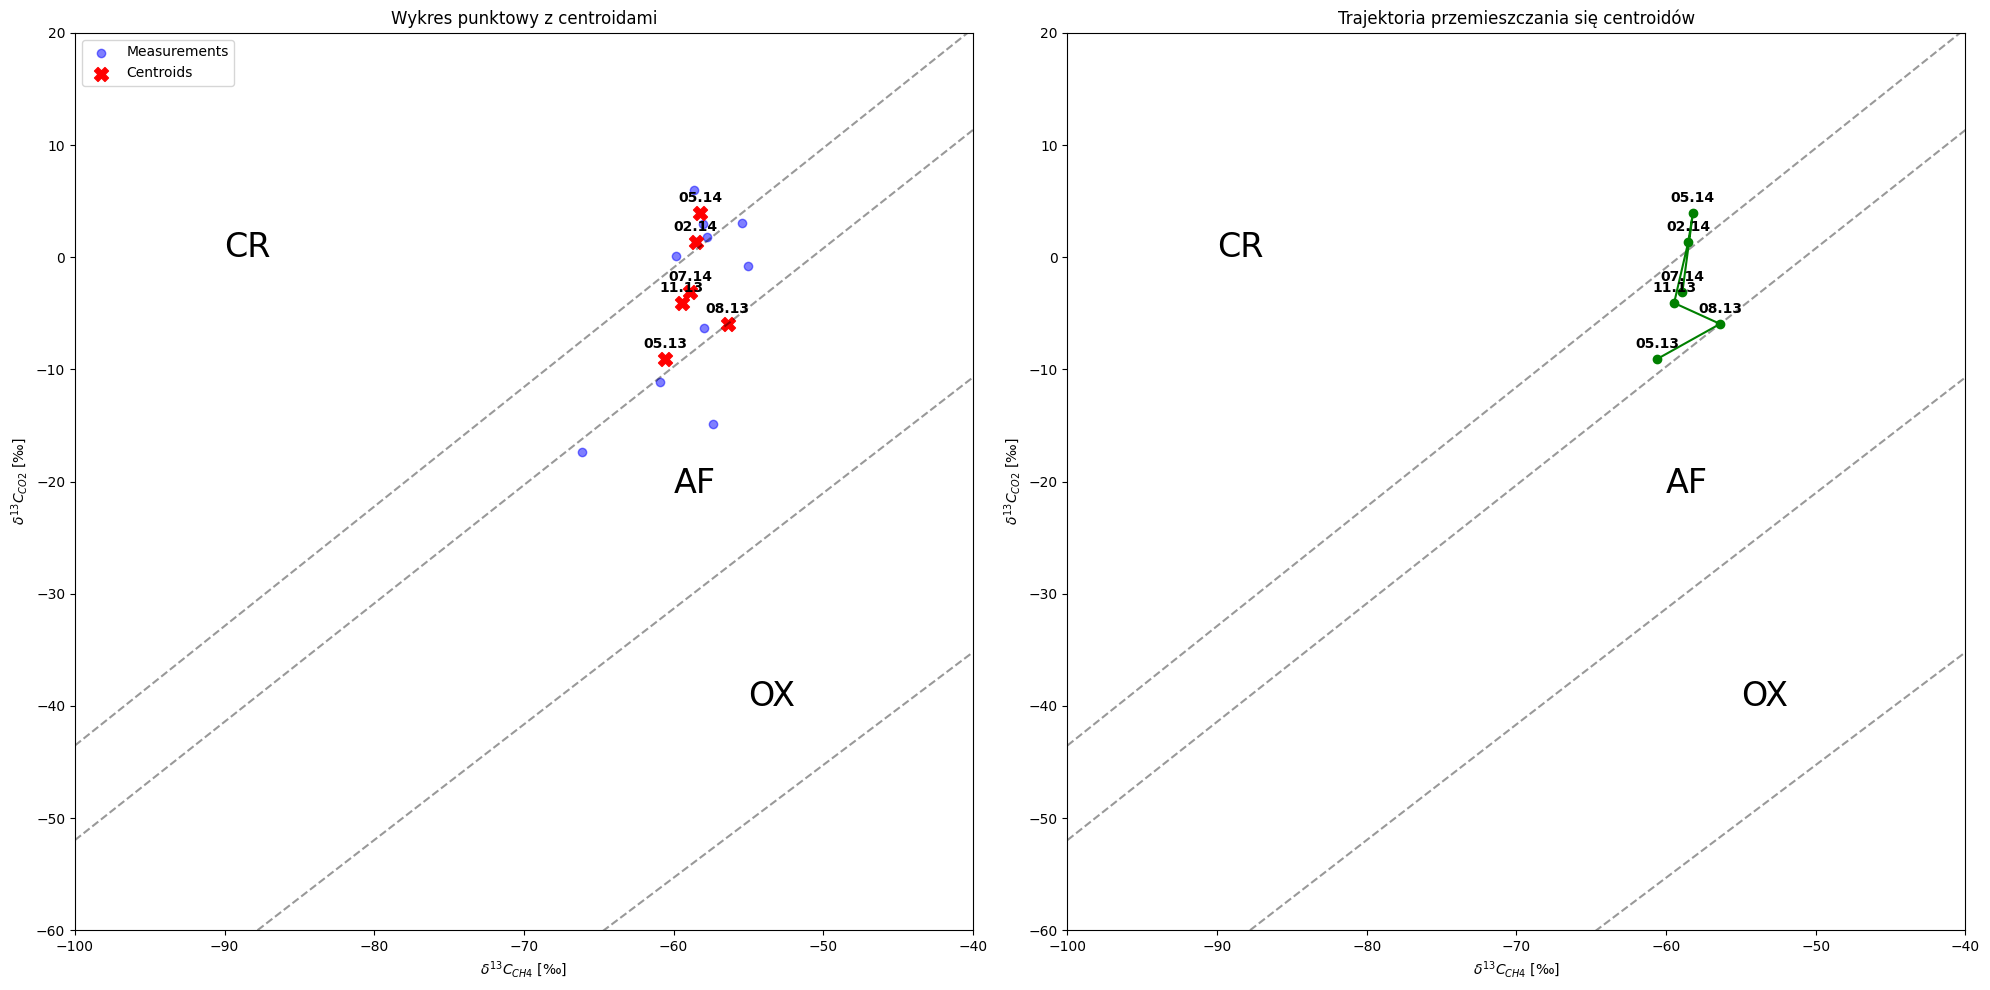

In [17]:
df_filtered = df[~df['Station'].isin(['KOP-2', 'KOP-3'])]

centroids = df_filtered.groupby('Date').agg({'CH4': 'mean', 'CO2': 'mean'}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes = axes.flatten()

axes[0].scatter(df_filtered['CH4'], df_filtered['CO2'], label="Measurements", alpha=0.5, color='blue')
axes[0].scatter(centroids['CH4'], centroids['CO2'], label="Centroids", color='red', s=100, marker='X')

for i, row in centroids.iterrows():
    axes[0].text(row['CH4'], row['CO2'] + 1, row['Date'].strftime('%m.%y'), color='black', fontsize=10, ha='center', fontweight='bold')
    axes[1].text(row['CH4'], row['CO2'] + 1, row['Date'].strftime('%m.%y'), color='black', fontsize=10, ha='center', fontweight='bold')

for i in range(2):
    plot_boundries(x, axes[i])
    plot_area_labels(axes[i])

    axes[i].set_xlim(-100, -40)
    axes[i].set_ylim(-60, 20)

    axes[i].set_xlabel(r"$\delta^{13}C_{CH4}$ [‰]")
    axes[i].set_ylabel(r"$\delta^{13}C_{CO2}$ [‰]")

axes[0].set_title("Wykres punktowy z centroidami")
axes[0].legend()

axes[1].plot(centroids['CH4'], centroids['CO2'], marker='o', color='green')
axes[1].set_title("Trajektoria przemieszczania się centroidów")

plt.tight_layout()
plt.show()

## Analysis of sulfate sources

In [18]:
data = [
    ["NC1-0893", "North Airdrie", 16.66, 1993],
    ["NC2-0893", "Airdrie", 7.88, 1993],
    ["NC3-0893", "North Crossing", 5.53, 1993],
    ["NC4-0893", "South Crossing", 6.15, 1993],
    ["NC5-0893", "Country Hills", 4.61, 1993],
    ["NC6-0893", "32nd Ave. NW", -5.89, 1993],
    ["NC7-0893", "Calgary ZOO", -6.25, 1993],
    ["NC8-0893", "Centre Street", -7.44, 1993],
    ["NC1-0696", "North Airdrie", None, 1996],
    ["NC2-0696", "Airdrie", 12.56, 1996],
    ["NC3-0696", "North Crossing", 10.82, 1996],
    ["NC4-0696", "South Crossing", 9.68, 1996],
    ["NC5-0696", "Country Hills", 7.21, 1996],
    ["NC6-0696", "32nd Ave. NW", 0.33, 1996],
    ["NC7-0696", "Calgary ZOO", -1.02, 1996],
    ["NC8-0696", "Centre Street", -0.83, 1996]
]

In [21]:
POWER_PLAN_Y = 25
BOWNESS_Y = 10.48
HUMUS_LOWER_Y = 3
HUMUS_UPPER_Y = 10
GYPSUM_Y = -11.5

In [22]:
df = pd.DataFrame(data, columns=["Station", "Location", "SO4", "Year"])

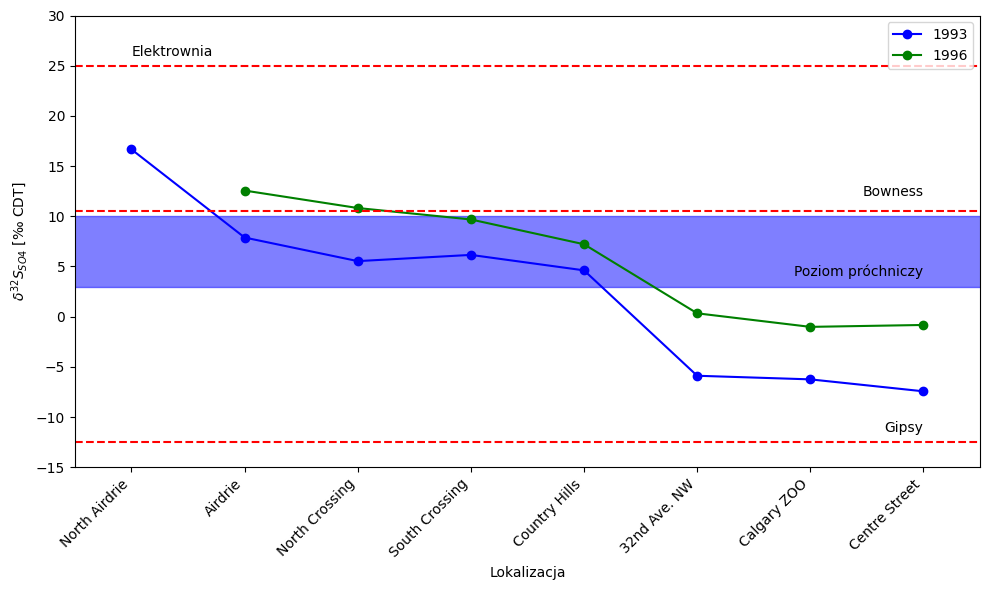

In [23]:
df_1993 = df[df["Year"] == 1993]
df_1996 = df[df["Year"] == 1996]

plt.figure(figsize=(10, 6))

plt.plot(df_1993["Location"], df_1993["SO4"], marker='o', label="1993", color='blue')
plt.plot(df_1996["Location"], df_1996["SO4"], marker='o', label="1996", color='green')

plt.axhline(y=POWER_PLAN_Y, color='red', linestyle='--')
plt.text(0, 26, "Elektrownia", color='#000000', ha='left')

plt.axhline(y=BOWNESS_Y, color='red', linestyle='--')
plt.text(len(df["Location"].unique()) - 1, 12, "Bowness", color='#000000', ha='right')

plt.fill_between(np.arange(-1, len(df["Location"].unique()) + 1), HUMUS_LOWER_Y, HUMUS_UPPER_Y, color='blue', alpha=0.5)
plt.text(len(df["Location"].unique()) - 1, 4, "Poziom próchniczy", color='#000000', ha='right')

plt.axhline(y=-12.5, color='red', linestyle='--')
plt.text(len(df["Location"].unique()) - 1, GYPSUM_Y, "Gipsy", color='#000000', ha='right')

plt.xlabel('Lokalizacja')
plt.ylabel(r"$\delta^{32}S_{SO4}$ [‰ CDT]")
plt.ylim(-15, 30)
plt.xlim(-0.5, len(df["Location"].unique()) - 0.5)

plt.xticks(rotation=45, ha='right')

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()